In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)

In [3]:
import io
import requests
url="https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/SRAG/2020/INFLUD-14-06-2021.csv"
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')),sep= ';')

C:\Users\fumio\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (15,60,62,63,64,92,94,106,108,115,117,118,119,123) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
url = "https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/SRAG/2021/INFLUD21-14-06-2021.csv"
s = requests.get(url).content
df1=pd.read_csv(io.StringIO(s.decode('utf-8')),sep= ";")

C:\Users\fumio\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (15,18,60,62,63,64,92,94,106,108,115,117,118,119,123,144,160) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
df.shape

(1195427, 154)

In [6]:
df1.shape

(1034181, 162)

In [7]:
df.rename(str.lower, axis='columns', inplace=True)

In [8]:
df1.rename(str.lower, axis = 'columns', inplace=True)

In [9]:
dados_filtrados = df[['nu_idade_n','dt_notific','dt_nasc','pcr_sars2','classi_fin', 'hospital' , 'uti', 'evolucao', 'dt_evoluca']]


dados_filtrados.head(15)
print(dados_filtrados.shape)

(1195427, 9)


In [10]:
dados_filtrados1 = df1[['nu_idade_n','dt_notific','dt_nasc','pcr_sars2','classi_fin', 'hospital' , 'uti', 'evolucao', 'dt_evoluca']]


dados_filtrados1.head(15)
print(dados_filtrados1.shape)

(1034181, 9)


In [11]:
dados_filtrados = pd.concat([dados_filtrados,dados_filtrados1])

In [12]:
print(dados_filtrados.shape)

(2229608, 9)


In [13]:
dados_filtrados = dados_filtrados.query('classi_fin == 5')

In [14]:
print(dados_filtrados.shape)

(1431694, 9)


In [15]:
dados_filtrados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1431694 entries, 25 to 1034180
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   nu_idade_n  1431694 non-null  int64  
 1   dt_notific  1431694 non-null  object 
 2   dt_nasc     1430086 non-null  object 
 3   pcr_sars2   928003 non-null   float64
 4   classi_fin  1431694 non-null  float64
 5   hospital    1397958 non-null  float64
 6   uti         1251890 non-null  float64
 7   evolucao    1278983 non-null  float64
 8   dt_evoluca  1187049 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 109.2+ MB


In [16]:
selection = dados_filtrados['dt_evoluca'].notna()
dados_filtrados = dados_filtrados[selection]
dados_filtrados.shape

(1187049, 9)

In [17]:
dados_filtrados = dados_filtrados.query('evolucao ==2')
dados_filtrados.shape

(459127, 9)

In [18]:
dados_filtrados.query('nu_idade_n > 100')

,nu_idade_n,dt_notific,dt_nasc,pcr_sars2,classi_fin,hospital,uti,evolucao,dt_evoluca
3736,105,18/07/2020,06/05/1915,1.0,5.0,2.0,NaN,2.0,27/07/2020
3775,102,20/07/2020,20/06/1918,1.0,5.0,1.0,1.0,2.0,21/07/2020
5634,105,08/08/2020,12/05/1915,1.0,5.0,1.0,2.0,2.0,08/08/2020
7359,101,05/10/2020,16/06/1919,NaN,5.0,1.0,1.0,2.0,07/10/2020
10598,101,15/05/2020,27/08/1918,1.0,5.0,2.0,NaN,2.0,15/05/2020
...,...,...,...,...,...,...,...,...,...
1018545,102,22/03/2021,15/08/1918,1.0,5.0,2.0,NaN,2.0,07/04/2021
1019030,108,19/03/2021,07/05/1912,NaN,5.0,1.0,NaN,2.0,28/03/2021
1021623,105,09/04/2021,09/01/1916,1.0,5.0,1.0,1.0,2.0,04/05/2021
1026445,103,26/04/2021,25/03/1918,1.0,5.0,1.0,2.0,2.0,28/04/2021


In [19]:
dados_filtrados.reset_index(inplace=True)

In [20]:
dados_filtrados.head()

,index,nu_idade_n,dt_notific,dt_nasc,pcr_sars2,classi_fin,hospital,uti,evolucao,dt_evoluca
0,25,69,30/03/2020,18/01/1951,1.0,5.0,1.0,2.0,2.0,08/04/2020
1,37,88,22/03/2020,18/04/1931,1.0,5.0,1.0,NaN,2.0,20/03/2020
2,53,54,20/03/2020,16/11/1965,1.0,5.0,1.0,1.0,2.0,29/03/2020
3,61,77,21/03/2020,20/01/1943,1.0,5.0,1.0,1.0,2.0,02/04/2020
4,73,18,23/03/2020,22/05/2001,1.0,5.0,1.0,1.0,2.0,02/05/2020


In [21]:
# for i in range(0,dados_filtrados.shape[0]):
#     dados_filtrados.dt_evoluca[i] = dados_filtrados.dt_evoluca[i][3:6]+dados_filtrados.dt_evoluca[i][0:3]+dados_filtrados.dt_evoluca[i][6:10]

In [22]:
#dados_filtrados.dt_evoluca = dados_filtrados.dt_evoluca.astype('datetime64[ns]')

#12:30 de processamento para 304000 linhas
#40:30 de processamento para 551805 linhas

In [23]:
from datetime import datetime

for i in range(0,dados_filtrados.shape[0]):
     dados_filtrados.dt_evoluca[i] = datetime.strptime(dados_filtrados.dt_evoluca[i], '%d/%m/%Y')

<ipython-input-23-4d2d37c58973>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_filtrados.dt_evoluca[i] = datetime.strptime(dados_filtrados.dt_evoluca[i], '%d/%m/%Y')


In [24]:
dados_filtrados.describe()

,index,nu_idade_n,pcr_sars2,classi_fin,hospital,uti,evolucao
count,4.591270e+05,459127.000000,303651.0,459127.0,445005.000000,399264.000000,459127.0
mean,5.558977e+05,66.676046,1.0,5.0,1.059127,1.560977,2.0
std,3.245567e+05,15.624576,0.0,0.0,0.508170,1.308588,0.0
min,1.300000e+01,0.000000,1.0,5.0,1.000000,1.000000,2.0
25%,2.752520e+05,57.000000,1.0,5.0,1.000000,1.000000,2.0
50%,5.524020e+05,68.000000,1.0,5.0,1.000000,1.000000,2.0
75%,8.300055e+05,78.000000,1.0,5.0,1.000000,2.000000,2.0
max,1.195415e+06,127.000000,1.0,5.0,9.000000,9.000000,2.0


In [25]:
dados_filtrados.set_index('dt_evoluca')

,index,nu_idade_n,dt_notific,dt_nasc,pcr_sars2,classi_fin,hospital,uti,evolucao
dt_evoluca,,,,,,,,,
2020-04-08,25,69,30/03/2020,18/01/1951,1.0,5.0,1.0,2.0,2.0
2020-03-20,37,88,22/03/2020,18/04/1931,1.0,5.0,1.0,NaN,2.0
2020-03-29,53,54,20/03/2020,16/11/1965,1.0,5.0,1.0,1.0,2.0
2020-04-02,61,77,21/03/2020,20/01/1943,1.0,5.0,1.0,1.0,2.0
2020-05-02,73,18,23/03/2020,22/05/2001,1.0,5.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...
2021-05-28,1034164,46,17/05/2021,11/11/1974,1.0,5.0,1.0,1.0,2.0
2021-05-29,1034169,66,25/05/2021,09/08/1954,NaN,5.0,1.0,2.0,2.0
2021-05-19,1034175,96,14/05/2021,29/07/1924,1.0,5.0,1.0,1.0,2.0


## Verificando a data do último caso de óbito

In [26]:
dados_filtrados.index.max()

459126

## Procurando outliers

In [27]:
dados_filtrados = dados_filtrados.query('nu_idade_n <= 124')

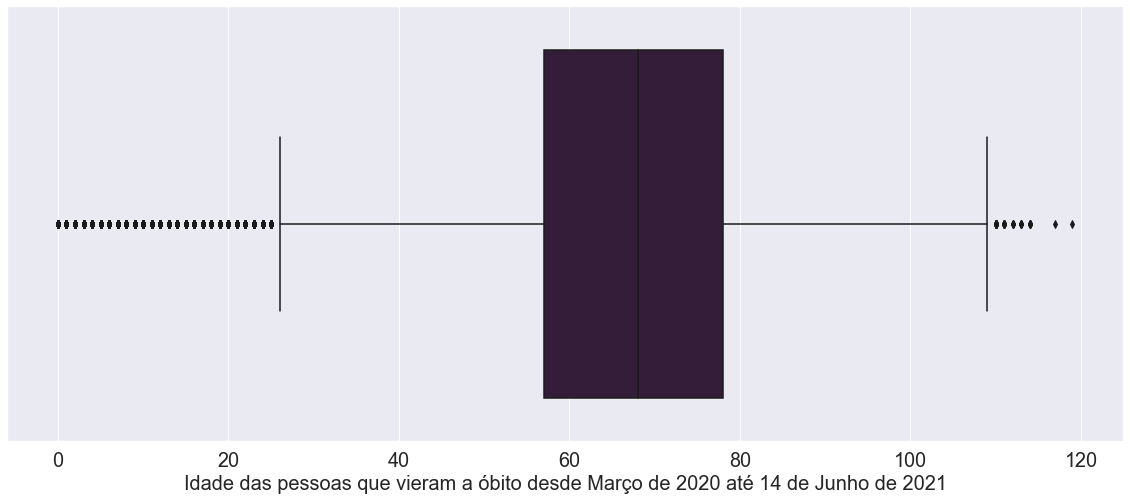

In [36]:
import seaborn as sns
sns.set_palette("rocket")

ax = sns.boxplot(data = dados_filtrados, x = 'nu_idade_n' )
ax.set_xlabel("Idade das pessoas que vieram a óbito desde Março de 2020 até 14 de Junho de 2021", fontsize = 20)
ax.figure.set_size_inches(20,8)
sns.set(font_scale = 1.8)

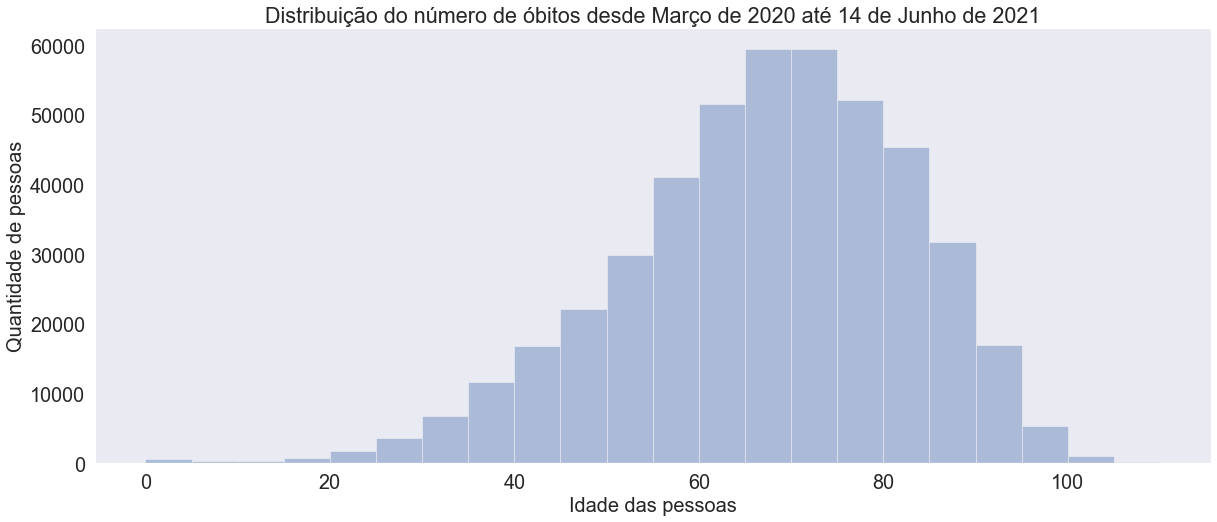

In [70]:
ax = sns.distplot(dados_filtrados.nu_idade_n, kde = False, 
                  bins = [i*5 for(i) in range (23)])
ax.set_xlabel("Idade das pessoas", 
              fontsize = 20, position=(0.5,0))
ax.set_ylabel("Quantidade de pessoas", 
              fontsize = 20, position=(0.5,0.5))
ax.grid(None)

ax.set_title('Distribuição do número de óbitos desde Março de 2020 até 14 de Junho de 2021')

ax.figure.set_size_inches(20,8)

# Gerando o gráfico 1

In [123]:
#dados_filtrados = dados_filtrados.sort_values(by= 'dt_evoluca')
categories = ['Até 10 anos','De 11 a 20 anos','De 21 a 30 anos',
                              'De 31 a 40 anos','De 41 a 50 anos','De 51 a 60 anos',
                              'De 61 a 70 anos','De 71 a 80 anos','De 81 a 90 anos','Mais de 90 anos']
faixa_idade = [dados_filtrados.nu_idade_n.min(), 10 , 20 , 30 , 40 , 50 , 60 , 70 , 80 , 90, dados_filtrados.nu_idade_n.max()]
dados_filtrados['faixa'] = pd.cut(dados_filtrados.nu_idade_n,bins= faixa_idade,labels = categories, include_lowest= True)

In [124]:
dados_filtrados.index = pd.to_datetime(dados_filtrados['dt_evoluca'],format='%m/%d/%y %I:%M%p')
dados_filtrados.faixa.unique();

In [125]:
dados_data = dados_filtrados.groupby(pd.Grouper(freq= 'M'))

In [126]:
dados_data.groups;

In [127]:
df2003 = dados_data.get_group('2020-03-31')
df2004 = dados_data.get_group('2020-04-30')
df2005 = dados_data.get_group('2020-05-31')
df2006 = dados_data.get_group('2020-06-30')
df2007 = dados_data.get_group('2020-07-31')
df2008 = dados_data.get_group('2020-08-31')
df2009 = dados_data.get_group('2020-09-30')
df2010 = dados_data.get_group('2020-10-31')
df2011 = dados_data.get_group('2020-11-30')
df2012 = dados_data.get_group('2020-12-31')
df2101 = dados_data.get_group('2021-01-31')
df2102 = dados_data.get_group('2021-02-28')
df2103 = dados_data.get_group('2021-03-31')
df2104 = dados_data.get_group('2021-04-30')
df2105 = dados_data.get_group('2021-05-31')
df2106 = dados_data.get_group('2021-06-30')

In [128]:
todos_meses = [df2003 ,df2004 ,df2005 ,df2006 ,df2007 ,df2008 ,df2009 ,df2010 ,df2011,df2012,df2101,df2102,df2103,df2104,df2105,df2106]

for i in range(0,len(todos_meses)):
    #print(i)
    todos_meses[i] = todos_meses[i].groupby('faixa').nu_idade_n.count()


In [129]:
for i in range(0,len(todos_meses)):
    #print(i)
    if i+3 <= 12 :
        todos_meses[i].rename('2020 - '+"%02d" % (i+3),inplace= True)
    else:
        todos_meses[i].rename('2021 - '+"%02d" % (i-9),inplace= True)

In [130]:
de2003_ate2106 = pd.DataFrame()

for i in range(0,len(todos_meses)):
    de2003_ate2106 = de2003_ate2106.append(todos_meses[i])

In [131]:
de2003_ate2106 = de2003_ate2106.T

In [132]:
de2003_ate2106

,2020 - 03,2020 - 04,2020 - 05,2020 - 06,2020 - 07,2020 - 08,2020 - 09,2020 - 10,2020 - 11,2020 - 12,2021 - 01,2021 - 02,2021 - 03,2021 - 04,2021 - 05,2021 - 06
Até 10 anos,7.0,38.0,140.0,99.0,97.0,64.0,43.0,40.0,35.0,64.0,73.0,60.0,106.0,106.0,75.0,23.0
De 11 a 20 anos,4.0,49.0,122.0,92.0,85.0,66.0,53.0,56.0,37.0,56.0,65.0,59.0,145.0,136.0,128.0,30.0
De 21 a 30 anos,8.0,158.0,399.0,346.0,331.0,274.0,207.0,155.0,135.0,227.0,303.0,360.0,1072.0,1082.0,847.0,324.0
De 31 a 40 anos,45.0,541.0,1226.0,1067.0,1034.0,745.0,523.0,427.0,412.0,721.0,988.0,1067.0,3620.0,3742.0,3043.0,1052.0
De 41 a 50 anos,50.0,1214.0,2486.0,2098.0,2118.0,1715.0,1200.0,861.0,768.0,1499.0,1981.0,2200.0,7297.0,7563.0,6116.0,2106.0
De 51 a 60 anos,86.0,2008.0,4825.0,3919.0,4188.0,3451.0,2413.0,1693.0,1671.0,3198.0,4092.0,4130.0,12511.0,13045.0,10632.0,3441.0
De 61 a 70 anos,175.0,3052.0,7731.0,6620.0,7033.0,6117.0,4351.0,3251.0,3234.0,5941.0,7403.0,6976.0,18956.0,19210.0,11604.0,2177.0
De 71 a 80 anos,169.0,2937.0,8287.0,7433.0,7755.0,6895.0,5020.0,3649.0,3703.0,6629.0,8330.0,7151.0,17939.0,15213.0,6630.0,1597.0
De 81 a 90 anos,133.0,2127.0,6030.0,5507.0,5869.0,5049.0,3837.0,2653.0,2729.0,5080.0,5956.0,5141.0,10326.0,6257.0,3960.0,1287.0
Mais de 90 anos,38.0,583.0,1719.0,1611.0,1606.0,1401.0,941.0,744.0,770.0,1367.0,1608.0,1358.0,2259.0,1356.0,1067.0,280.0


In [133]:
de2003_ate2106_porcentagem = pd.DataFrame()

for mes in de2003_ate2106:
    de2003_ate2106_porcentagem[str(mes)] = (de2003_ate2106[mes].values/de2003_ate2106[mes].values.sum())

de2003_ate2106_porcentagem.index = de2003_ate2106.index

<ipython-input-134-1e3933c2b798>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0%' , '20%', '40%' , '60%', '80%', '100%'])


Text(0.5, 0, 'Ano-mês')

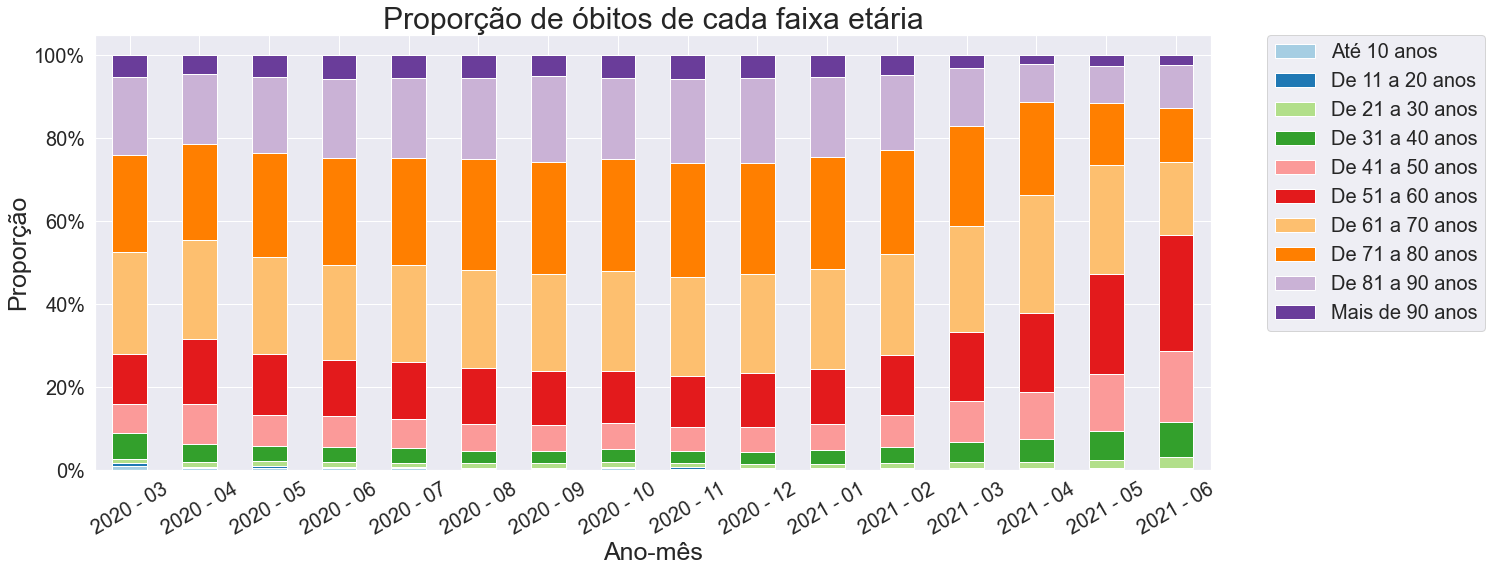

In [134]:
sns.set_palette("Paired")

ax = de2003_ate2106_porcentagem.T.plot(kind= 'bar' , stacked= True, figsize= (20,8),fontsize =20)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 20)
ax.set_yticklabels(['0%' , '20%', '40%' , '60%', '80%', '100%'])
ax.set_ylabel("Proporção",fontsize=25)
ax.set_title("Proporção de óbitos de cada faixa etária", fontsize = 30)
ax.set_xticklabels(de2003_ate2106.columns, rotation=30)
ax.set_xlabel("Ano-mês",fontsize=25)

# Gerando o Gráfico 2

In [95]:
faixa_idade = [dados_filtrados.nu_idade_n.min(), 60 , dados_filtrados.nu_idade_n.max()]
conteudo = ['Até 60 anos' , 'Mais de 61 anos']
dados_filtrados['faixa'] = pd.cut(dados_filtrados.nu_idade_n,bins= faixa_idade, labels = conteudo, include_lowest= True)

In [96]:
dados_filtrados.index = pd.to_datetime(dados_filtrados['dt_evoluca'],format='%m/%d/%y %I:%M%p')
dados_filtrados.faixa.unique()

['Mais de 61 anos', 'Até 60 anos']
Categories (2, object): ['Até 60 anos' < 'Mais de 61 anos']

In [97]:
dados_data = dados_filtrados.groupby(pd.Grouper(freq= 'M'))

In [98]:
dados_data.groups;

In [99]:
df2003 = dados_data.get_group('2020-03-31')
df2004 = dados_data.get_group('2020-04-30')
df2005 = dados_data.get_group('2020-05-31')
df2006 = dados_data.get_group('2020-06-30')
df2007 = dados_data.get_group('2020-07-31')
df2008 = dados_data.get_group('2020-08-31')
df2009 = dados_data.get_group('2020-09-30')
df2010 = dados_data.get_group('2020-10-31')
df2011 = dados_data.get_group('2020-11-30')
df2012 = dados_data.get_group('2020-12-31')
df2101 = dados_data.get_group('2021-01-31')
df2102 = dados_data.get_group('2021-02-28')
df2103 = dados_data.get_group('2021-03-31')
df2104 = dados_data.get_group('2021-04-30')
df2105 = dados_data.get_group('2021-05-31')
df2106 = dados_data.get_group('2021-06-30')

In [100]:
todos_meses = [df2003 ,df2004 ,df2005 ,df2006 ,df2007 ,df2008 ,df2009 ,df2010 ,df2011,df2012,df2101,df2102,df2103,df2104,df2105,df2106]

for i in range(0,len(todos_meses)):
    #print(i)
    todos_meses[i] = todos_meses[i].groupby('faixa').nu_idade_n.count()


In [101]:
for i in range(0,len(todos_meses)):
    #print(i)
    if i+3 <= 12 :
        todos_meses[i].rename('2020 - '+"%02d" % (i+3),inplace= True)
    else:
        todos_meses[i].rename('2021 - '+"%02d" % (i-9),inplace= True)

In [102]:
de2003_ate2106 = pd.DataFrame()

for i in range(0,len(todos_meses)):
    de2003_ate2106 = de2003_ate2106.append(todos_meses[i])

In [103]:
de2003_ate2106 = de2003_ate2106.T

In [104]:
de2003_ate2106

,2020 - 03,2020 - 04,2020 - 05,2020 - 06,2020 - 07,2020 - 08,2020 - 09,2020 - 10,2020 - 11,2020 - 12,2021 - 01,2021 - 02,2021 - 03,2021 - 04,2021 - 05,2021 - 06
Até 60 anos,200.0,4008.0,9198.0,7621.0,7853.0,6315.0,4439.0,3232.0,3058.0,5765.0,7502.0,7876.0,24751.0,25674.0,20841.0,6976.0
Mais de 61 anos,515.0,8699.0,23767.0,21171.0,22263.0,19462.0,14149.0,10297.0,10436.0,19017.0,23297.0,20626.0,49480.0,42036.0,23261.0,5341.0


In [105]:
de2003_ate2106_porcentagem = pd.DataFrame()

for mes in de2003_ate2106:
    de2003_ate2106_porcentagem[str(mes)] = (de2003_ate2106[mes].values/de2003_ate2106[mes].values.sum())

de2003_ate2106_porcentagem.index = de2003_ate2106.index

<ipython-input-122-f9c0e4aa9742>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0%' , '20%', '40%' , '60%', '80%', '100%'])


Text(0.5, 0, 'Ano-mês')

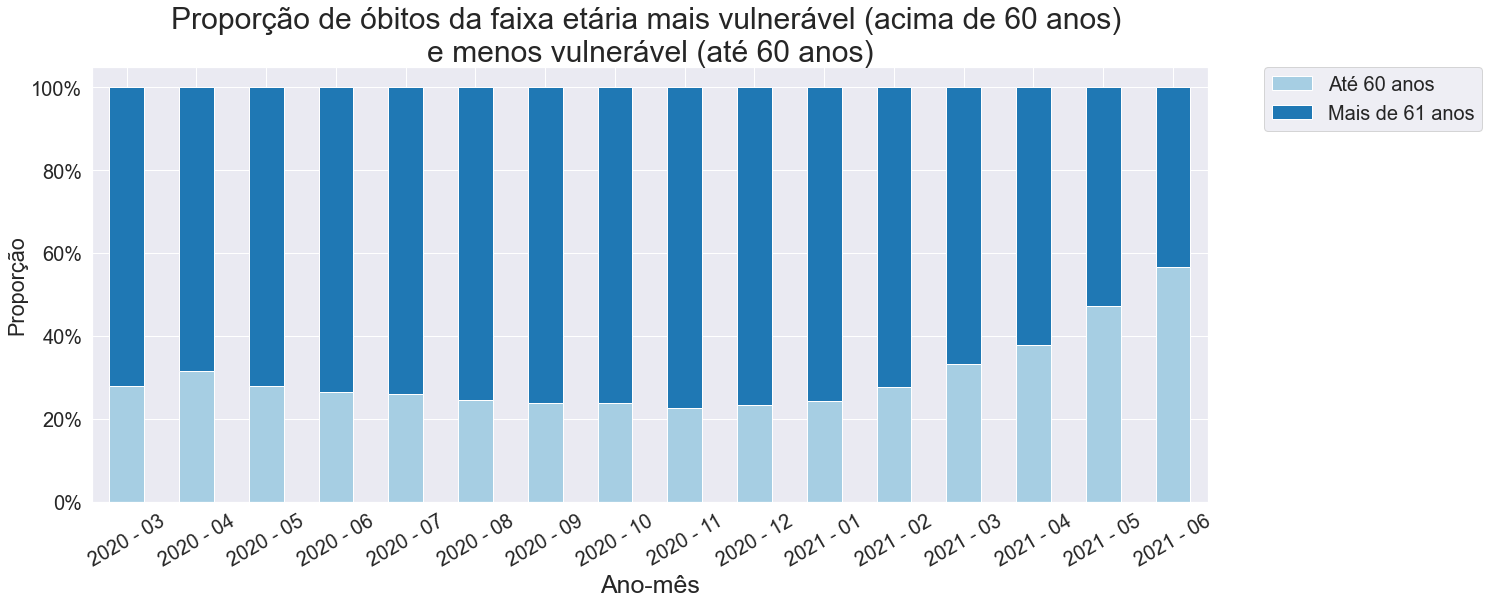

In [122]:
ax = de2003_ate2106_porcentagem.T.plot(kind= 'bar' , stacked= True, figsize= (20,8), fontsize =20)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 20)
ax.set_yticklabels(['0%' , '20%', '40%' , '60%', '80%', '100%'])
ax.set_ylabel("Proporção")
ax.set_title("Proporção de óbitos da faixa etária mais vulnerável (acima de 60 anos) \ne menos vulnerável (até 60 anos)", fontsize = 30)
ax.set_xticklabels(de2003_ate2106.columns, rotation=30)
ax.set_xlabel("Ano-mês",fontsize=25)